<div style="text-align: center;">
   <font size="5"> 2021年度　数式処理演習　pair試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2021/12/2実施 </font>
</div>

* file: ~/symbolic_math/exams/21_pair_ans.ipynb

以下の問題をpythonで解き，LUNAへ提出せよ．LUNAへはipynbとpdf形式の２種類を提出すること．

# 1微積分
## 1(a) 関数の概形(15点)

（テキストp.216の図6.6の確認)

直線$y=-2x+4$が, シグモイド関数
    \begin{equation*}
      \sigma(x) = \frac{1}{1+e^{-x}}
    \end{equation*}
を通す($y=\sigma(-2x+4)$）ことによって0と1の範囲に潰されることを確認せよ．

sympyのplotに対してy軸の表示範囲は，オプション
``` python
ylim=(-1,2)
```
をつけることで指定できる．

In [1]:
from sympy import *
init_printing()

In [3]:
x=symbols('x')
y=-2*x+4
y

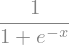

In [4]:
sig=1/(1+E**(-x))
sig

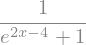

In [5]:
sig.subs(x,y)

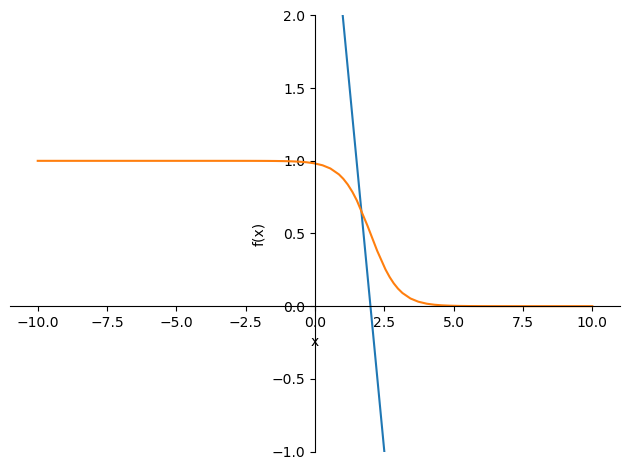

In [6]:
plot(y,sig.subs(x,y),ylim=(-1,2))

## 1(b) シグモイド関数(15点)

（テキストp.131の4-118式の確認)

シグモイド関数
    \begin{equation*}
      \sigma(x) = \frac{1}{1+e^{-x}}
    \end{equation*}
  の増減，極値，凹凸を調べ，曲線$y=\sigma(x)$の概形を描け．
  シグモイド関数の微分が
    \begin{equation*}
      \sigma(x)(1-\sigma(x))
    \end{equation*}
に一致することを確かめよ．両者を同時にプロットすることでも確かめられる．
ただし，曲線は重なるので，どちらかをy軸方向に0.01程度ずらして表示すること．

In [7]:
%reset -f
from sympy import *
init_printing()
x=symbols('x')

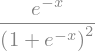

In [8]:
sig=1/(1+E**(-x))
dsig=sig.diff()
dsig

In [11]:
solve(dsig,x)

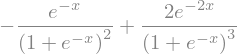

In [9]:
d2sig=dsig.diff()
d2sig

In [18]:
x0=solve(d2sig,x)[0]
x0

In [20]:
sig.subs(x,x0)

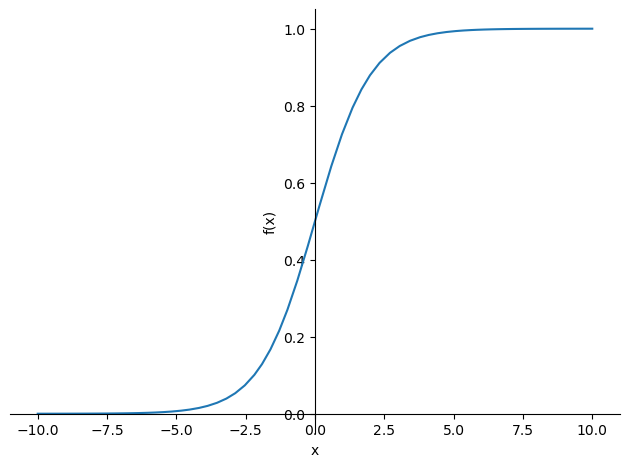

In [13]:
plot(sig)

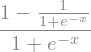

In [15]:
sig*(1-sig)

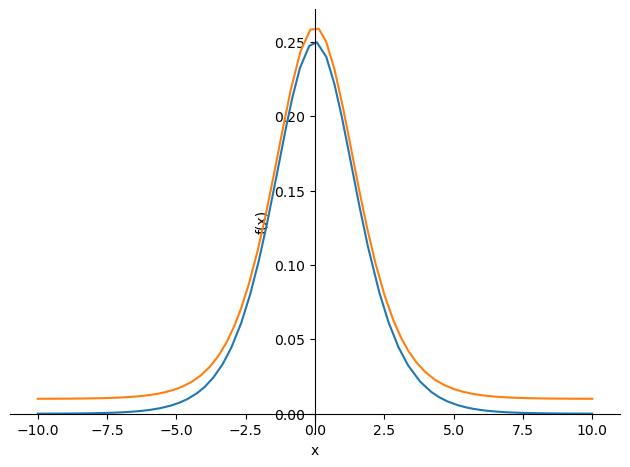

In [17]:
plot(dsig,sig*(1-sig)+0.01)

# 2 線形代数
## 2(a) 転置(15点)

(テキストp.115, 4-94式の確認）

$$A=\left(
\begin{array}{@{\,}ccc@{\,}}
1 & 2 & 3\\
4 & 5 & 6 \end{array}
\right)$$
$$
B = A^{\rm T}
$$
に対して，公式
$$
（AB)^{\rm T} = B^{\rm T} A^{\rm T}
$$
が成り立つことを確かめよ．

In [21]:
%reset -f
from sympy import *
init_printing()
x=symbols('x')

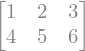

In [27]:
A=Matrix(([1,2,3],[4,5,6]))
A

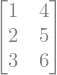

In [28]:
B=A.transpose()
B

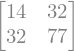

In [31]:
(A*B).transpose()

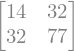

In [32]:
B.transpose()*B

## 2(b) (15点)

  次の行列$A$の固有値とそれに対する固有ベクトルを求めよ．
  \begin{equation*}
   A =  \left(
    \begin{matrix}
      -2 & -3 & 3\\
      1 & 2 & -3\\
      1 & 1 & -2
    \end{matrix}
    \right)
  \end{equation*}
  それぞれの固有値（$\lambda_i$），固有空間($x_i$)に対して，
  $$
  A x_i = \lambda_i x_i
  $$
  が成立することを確かめよ．

In [33]:
%reset -f
from sympy import *
init_printing()
x=symbols('x')

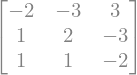

In [35]:
A=Matrix(([-2,-3,3],[1,2,-3],[1,1,-2]))
A

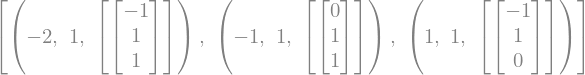

In [40]:
A.eigenvects()

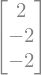

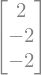

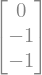

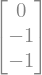

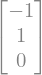

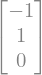

In [53]:
for eigenvals in A.eigenvects():
    eigenval,_,eigenvect=eigenvals
    display(A*eigenvect[0])
    display(eigenval*eigenvect[0])

# 3 センター試験原題(20点)
(2019大学入試センター試験　数学II・B 第2問(1),(2))

$p, q$ を実数とし，
関数$f(x)=x^3 + p x^2 +qx$ は$x=-1$で極値2を取るとする．
また，座標平面上の曲線$y=f(x)$を$C$,放物線$y=-kx^2$ を$D$,
放物線$D$上の点$(a, -ka^2)$をAとする．
ただし，　$k \gt 0, a\gt0$である．

(1) 関数$f(x)$が$x=-1$で極値をとるので，
$f'(-1) = \fbox{ ア }$である．
これと$f(-1)=2$より，　$p=\fbox{ イ }\,, q={ \fbox{ ウエ }}$である．
よって$f(x)$は$x= \fbox{ オ }$で極小値$ \fbox{ カキ }$をとる．


In [55]:
%reset -f
from sympy import *
init_printing()
x,p,q=symbols('x p q')

In [57]:
f=x**3+p*x**2+q*x
f

In [63]:
df=f.diff(x)
eq1=df.subs(x,-1)
eq1

In [64]:
eq2=f.subs(x,-1)-2
eq2

In [70]:
p0=solve(eq1+eq2)[0]
p0

In [74]:
q0=solve(eq1.subs(p,p0))[0]
q0

In [77]:
f=f.subs({p:p0,q:q0})
f

In [81]:
df=f.diff()
x0=solve(df)[1]
f.subs(x,x0)

(2) 点Aにおける放物線$D$の接線を$l$とする．
$D$と$l$および$x$軸で囲まれた図形の面積$S$を
$a$と$k$を用いて表そう．

$l$の方程式は
\begin{equation*}
  y = \fbox{ クケ }\,kax + \,ka^{ \fbox{ コ }}　... (1)
\end{equation*}
と表せる．
$l$と$x$軸の交点の$x$座標は
$\frac{\fbox{ サ }}{\fbox{ シ }}$であり，
$D$と$x$軸および
直線$x=a$で囲まれた図形の面積は
$\frac{k}{\fbox{ ス }}a^{\fbox{ セ }}$である．
よって，$S=\frac{k}{\fbox{ ソタ }} a^{\fbox{ セ }}$である．

In [84]:
a,k=symbols('a k')
y=-k*x**2

In [88]:
dy=y.diff(x)
m1=dy.subs(x,a)
m1

In [92]:
b1=-k*a**2-m1*x.subs(x,a)
b1

In [94]:
l=m1*x+b1
l

In [95]:
solve(l,x)

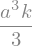

In [100]:
S0=integrate(-y,(x,0,a))
S0

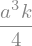

In [104]:
S1=(a-a/2)*k*a**2*(Rational(1,2))
S1

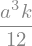

In [105]:
S=S0-S1
S

# 4 数値改変(20点)

大問3.において，関数$f(x)$が$x=-0.9$で極値2をとるとして問3(a)を解きなさい．
  問3(b)は変わらないので，解く必要ありません．
  極小値は$−3.66567655334305$ぐらいである．
  さらに，これらの値を用いて，(x,-2,2)で曲線$C, D$を同時にプロットしなさい．


In [106]:
%reset -f
from sympy import *
init_printing()
x,p,q=symbols('x p q')

In [107]:
f=x**3+p*x**2+q*x
f

In [108]:
df=f.diff(x)
eq1=df.subs(x,-0.9)
eq1

In [109]:
eq2=f.subs(x,-0.9)-2
eq2

In [115]:
p0=solve(eq1+eq2)[0][p]
p0

In [116]:
q0=solve(eq1.subs(p,p0))[0]
q0

In [117]:
f=f.subs({p:p0,q:q0})
f

In [118]:
df=f.diff()
x0=solve(df)[1]
f.subs(x,x0)